In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [ ]:
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_mod.npy')

In [ ]:
m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
# m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
# m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
# m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [ ]:
clus0_100 = np.load('necro_pars10k_cluster0_5720_mod.npy')
clus0_100n = np.load('necro_pars10k_cluster0_5720_mod.npy')
clus0_100nn = np.load('necro_pars10k_cluster0_5720_mod.npy')
clus0_100nnn = np.load('necro_pars10k_cluster0_5720_mod.npy')

In [ ]:
clus0_100n[:][:,p] = clus0_100n[:][:,p]*10
clus0_100n[:][:,p] = clus0_100n[:][:,p]/10

In [2]:
m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p3kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p3oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p10kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p10oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p11kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p11oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p12kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p12oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p13kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p13oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p15kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p15oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p16kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p16oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p17kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p17oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p18kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p18oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p19kd = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1p19oe = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')

In [3]:
m1p3kd[:][:,16] = m1p3kd[:][:,16]/10
m1p3oe[:][:,16] = m1p3oe[:][:,16]*10

m1p10kd[:][:,23] = m1p10kd[:][:,23]/10
m1p10oe[:][:,23] = m1p10oe[:][:,23]*10

m1p11kd[:][:,24] = m1p11kd[:][:,24]/10
m1p11oe[:][:,24] = m1p11oe[:][:,24]*10

m1p12kd[:][:,25] = m1p12kd[:][:,25]/10
m1p12oe[:][:,25] = m1p12oe[:][:,25]*10

m1p13kd[:][:,26] = m1p13kd[:][:,26]/10
m1p13oe[:][:,26] = m1p13oe[:][:,26]*10

m1p15kd[:][:,28] = m1p15kd[:][:,28]/10
m1p15oe[:][:,28] = m1p15oe[:][:,28]*10

m1p16kd[:][:,29] = m1p16kd[:][:,29]/10
m1p16oe[:][:,29] = m1p16oe[:][:,29]*10

m1p17kd[:][:,30] = m1p17kd[:][:,30]/10
m1p17oe[:][:,30] = m1p17oe[:][:,30]*10

m1p18kd[:][:,31] = m1p18kd[:][:,31]/10
m1p18oe[:][:,31] = m1p18oe[:][:,31]*10

m1p19kd[:][:,32] = m1p19kd[:][:,32]/10
m1p19oe[:][:,32] = m1p19oe[:][:,32]*10

In [ ]:
print(m1p19kd[:][:,32])
print(m1p19oe[:][:,32])

In [ ]:
print(m1p19kd[:][:,32])
print(m1p19oe[:][:,32])

In [4]:
t = np.linspace(0,1800,500)
m = model.components
print(list(model.initial_conditions))

[(A20(brip=None), Parameter('A20_0', 9075.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)), (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)), (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 22044.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0))]


In [5]:
solverwtm1 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=m1, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-16 17:42:44.187 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 17:42:44.920 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 17:42:44.987 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 17:42:45.192 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 17:47:10.641 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 17:47:10.643 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 17:47:13.144 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


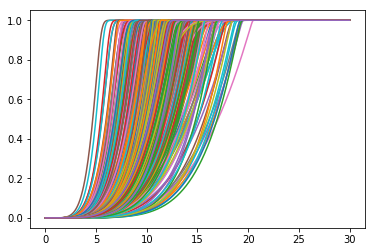

In [6]:
plt.figure()
for n in range(len(m1)):
    plt.plot(t/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544)
plt.show()

In [8]:
thresh = 2772
ttdwt = []
for j in range(len(m1)):
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100               

In [9]:
solverwtm1p3kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1p3kd  = solverwtm1p3kd.run(param_values=m1p3kd, num_processors = 20)
mode1df_p3kd = mode1wtm1p3kd.dataframe

2022-01-16 18:28:28.860 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 18:28:28.865 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 18:28:28.900 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 18:28:29.105 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 18:32:53.729 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 18:32:53.731 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 18:32:56.458 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [10]:
thresh = 2772
ttdp3kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_p3kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3kd.append(mode1df_p3kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3kd.append(np.inf)
for i in range(len(ttdp3kd)):
    if ttdp3kd[i] == np.inf:
        ttdp3kd[i] = 2100  

In [11]:
solverp3oe= ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p3oe  = solverp3oe.run(param_values=m1p3oe, num_processors = 20)
mode1df_p3oe  = mode1p3oe.dataframe

2022-01-16 18:37:01.577 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 18:37:01.583 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 18:37:01.619 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 18:37:01.832 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 18:41:30.917 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 18:41:30.919 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 18:41:33.428 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [12]:
thresh = 2772
ttdp3oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_p3oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3oe.append(mode1df_p3oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3oe.append(np.inf)
for i in range(len(ttdp3oe)):
    if ttdp3oe[i] == np.inf:
        ttdp3oe[i] = 2100  

In [13]:
solverp10kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p10kd  = solverp10kd.run(param_values=m1p10kd, num_processors = 20)
mode1df_p10kd = mode1p10kd.dataframe

2022-01-16 18:45:51.819 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 18:45:51.825 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 18:45:51.859 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 18:45:52.065 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 18:50:24.891 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 18:50:24.893 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 18:50:27.292 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [14]:
thresh = 2772
ttdp10kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_p10kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p10kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp10kd.append(mode1df_p10kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp10kd.append(np.inf)
for i in range(len(ttdp10kd)):
    if ttdp10kd[i] == np.inf:
        ttdp10kd[i] = 2100              

In [17]:
solverp10oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p10oe   = solverp10oe.run(param_values=m1p10oe, num_processors = 20)
mode1df_p10oe  = mode1p10oe.dataframe

2022-01-16 18:56:17.228 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 18:56:17.240 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 18:56:17.311 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 18:56:17.553 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 19:00:52.348 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 19:00:52.349 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 19:00:54.770 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [19]:
thresh = 2772
ttdp10oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_p10oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p10oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp10oe.append(mode1df_p10oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp10oe.append(np.inf)
for i in range(len(ttdp10oe)):
    if ttdp10oe[i] == np.inf:
        ttdp10oe[i] = 2100               

In [20]:
solverm1p11kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p11kd  = solverm1p11kd.run(param_values=m1p11kd, num_processors = 20)
mode1df_m1p11kd = mode1m1p11kd.dataframe

2022-01-16 19:19:56.461 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 19:19:56.467 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 19:19:56.502 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 19:19:56.712 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 19:24:25.886 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 19:24:25.887 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 19:24:28.499 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [21]:
thresh = 2772
ttdm1p11kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p11kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p11kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p11kd.append(mode1df_m1p11kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p11kd.append(np.inf)
for i in range(len(ttdm1p11kd)):
    if ttdm1p11kd[i] == np.inf:
        ttdm1p11kd[i] = 2100               

In [22]:
solverm1p11oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p11oe   = solverm1p11oe.run(param_values=m1p11oe, num_processors = 20)
mode1df_m1p11oe  = mode1m1p11oe.dataframe

2022-01-16 19:28:34.187 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 19:28:34.192 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 19:28:34.228 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 19:28:34.441 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 19:33:06.854 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 19:33:06.855 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 19:33:09.403 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [24]:
thresh = 2772
ttdm1p11oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p11oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p11oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p11oe.append(mode1df_m1p11oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p11oe.append(np.inf)
for i in range(len(ttdm1p11oe)):
    if ttdm1p11oe[i] == np.inf:
        ttdm1p11oe[i] = 2100               

In [25]:
solverm1p12kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12kd  = solverm1p12kd.run(param_values=m1p12kd, num_processors = 20)
mode1df_m1p12kd = mode1m1p12kd.dataframe

2022-01-16 19:37:36.868 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 19:37:36.873 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 19:37:36.909 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 19:37:37.119 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 19:42:07.944 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 19:42:07.946 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 19:42:10.401 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [26]:
thresh = 2772
ttdm1p12kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p12kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12kd.append(mode1df_m1p12kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12kd.append(np.inf)
for i in range(len(ttdm1p12kd)):
    if ttdm1p12kd[i] == np.inf:
        ttdm1p12kd[i] = 2100               

In [68]:
solverm1p12oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12oe  = solverm1p12oe.run(param_values=m1p12oe, num_processors = 20)
mode1df_m1p12oe = mode1m1p12oe.dataframe

2022-01-16 21:57:04.536 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 21:57:04.548 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 21:57:04.622 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 21:57:04.869 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 22:01:42.654 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 22:01:42.656 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 22:01:45.356 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [69]:
thresh = 2772
ttdm1p12oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p12oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12oe.append(mode1df_m1p12oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12oe.append(np.inf)
for i in range(len(ttdm1p12oe)):
    if ttdm1p12oe[i] == np.inf:
        ttdm1p12oe[i] = 2100               

In [27]:
solverm1p13kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13kd  = solverm1p13kd.run(param_values=m1p13kd, num_processors = 20)
mode1df_m1p13kd = mode1m1p13kd.dataframe

2022-01-16 19:48:13.168 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 19:48:13.173 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 19:48:13.208 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 19:48:13.415 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 19:52:46.233 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 19:52:46.236 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 19:52:48.867 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [28]:
thresh = 2772
ttdm1p13kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p13kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13kd.append(mode1df_m1p13kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13kd.append(np.inf)
for i in range(len(ttdm1p13kd)):
    if ttdm1p13kd[i] == np.inf:
        ttdm1p13kd[i] = 2100    

In [29]:
solverm1p13oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13oe  = solverm1p13oe.run(param_values=m1p13oe, num_processors = 20)
mode1df_m1p13oe = mode1m1p13oe.dataframe

2022-01-16 19:57:10.205 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 19:57:10.210 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 19:57:10.246 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 19:57:10.454 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:01:43.262 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:01:43.264 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:01:46.041 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [30]:
thresh = 2772
ttdm1p13oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p13oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13oe.append(mode1df_m1p13oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13oe.append(np.inf)
for i in range(len(ttdm1p13oe)):
    if ttdm1p13oe[i] == np.inf:
        ttdm1p13oe[i] = 2100    

In [31]:
solverm1p15kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p15kd  = solverm1p15kd.run(param_values=m1p15kd, num_processors = 20)
mode1df_m1p15kd = mode1m1p15kd.dataframe

2022-01-16 20:05:55.151 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:05:55.157 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:05:55.193 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:05:55.403 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:10:31.684 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:10:31.685 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:10:34.110 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [32]:
thresh = 2772
ttdm1p15kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p15kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p15kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p15kd.append(mode1df_m1p15kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p15kd.append(np.inf)
for i in range(len(ttdm1p15kd)):
    if ttdm1p15kd[i] == np.inf:
        ttdm1p15kd[i] = 2100    

In [33]:
solverm1p15oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p15oe = solverm1p15oe.run(param_values=m1p15oe, num_processors = 20)
mode1df_mm1p15oe = mode1m1p15oe.dataframe

2022-01-16 20:15:16.825 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:15:16.830 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:15:16.865 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:15:17.069 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:19:47.767 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:19:47.769 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:19:50.439 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [34]:
thresh = 2772
ttdm1p15oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_mm1p15oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_mm1p15oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p15oe.append(mode1df_mm1p15oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p15oe.append(np.inf)
for i in range(len(ttdm1p15oe)):
    if ttdm1p15oe[i] == np.inf:
        ttdm1p15oe[i] = 2100   

In [35]:
solverm1p16kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p16kd  = solverm1p16kd.run(param_values=m1p16kd, num_processors = 20)
mode1df_m1p16kd = mode1m1p16kd.dataframe

2022-01-16 20:23:50.803 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:23:50.810 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:23:50.847 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:23:51.147 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:28:30.095 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:28:30.097 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:28:32.552 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [36]:
thresh = 2772
ttdm1p16kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p16kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p16kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p16kd.append(mode1df_m1p16kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p16kd.append(np.inf)
for i in range(len(ttdm1p16kd)):
    if ttdm1p16kd[i] == np.inf:
        ttdm1p16kd[i] = 2100   

In [37]:
solverm1p16oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p16oe  = solverm1p16oe.run(param_values=m1p16oe, num_processors = 20)
mode1df_m1p16oe = mode1m1p16oe.dataframe

2022-01-16 20:32:41.007 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:32:41.013 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:32:41.048 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:32:41.258 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:37:20.802 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:37:20.804 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:37:23.253 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [38]:
thresh = 2772
ttdm1p16oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p16oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p16oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p16oe.append(mode1df_m1p16oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p16oe.append(np.inf)
for i in range(len(ttdm1p16oe)):
    if ttdm1p16oe[i] == np.inf:
        ttdm1p16oe[i] = 2100   

In [39]:
solverm1p17kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p17kd  = solverm1p17kd.run(param_values=m1p17kd, num_processors = 20)
mode1df_m1p17kd = mode1m1p17kd.dataframe

2022-01-16 20:41:35.368 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:41:35.374 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:41:35.415 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:41:35.634 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:46:16.888 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:46:16.889 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:46:19.392 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [40]:
thresh = 2772
ttdm1p17kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p17kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p17kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p17kd.append(mode1df_m1p17kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p17kd.append(np.inf)
for i in range(len(ttdm1p17kd)):
    if ttdm1p17kd[i] == np.inf:
        ttdm1p17kd[i] = 2100   

In [41]:
solverm1p17oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p17oe  = solverm1p17oe.run(param_values=m1p17oe, num_processors = 20)
mode1df_m1p17oe = mode1m1p17oe.dataframe

2022-01-16 20:50:17.005 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:50:17.010 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:50:17.046 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:50:17.255 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 20:54:55.635 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 20:54:55.637 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 20:54:58.098 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [42]:
thresh = 2772
ttdm1p17oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p17oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p17oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p17oe.append(mode1df_m1p17oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p17oe.append(np.inf)
for i in range(len(ttdm1p17oe)):
    if ttdm1p17oe[i] == np.inf:
        ttdm1p17oe[i] = 2100   

In [43]:
solverm1p18kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p18kd  = solverm1p18kd.run(param_values=m1p18kd, num_processors = 20)
mode1df_m1p18kd = mode1m1p18kd.dataframe

2022-01-16 20:59:36.131 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 20:59:36.137 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 20:59:36.172 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 20:59:36.383 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 21:04:14.289 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 21:04:14.290 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 21:04:16.825 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [44]:
thresh = 2772
ttdm1p18kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p18kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p18kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p18kd.append(mode1df_m1p18kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p18kd.append(np.inf)
for i in range(len(ttdm1p18kd)):
    if ttdm1p18kd[i] == np.inf:
        ttdm1p18kd[i] = 2100   

In [45]:
solverm1p18oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p18oe  = solverm1p18oe.run(param_values=m1p18oe, num_processors = 20)
mode1df_m1p18oe = mode1m1p18oe.dataframe

2022-01-16 21:08:31.533 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 21:08:31.539 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 21:08:31.574 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 21:08:31.782 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 21:13:09.877 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 21:13:09.879 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 21:13:12.508 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [46]:
thresh = 2772
ttdm1p18oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p18oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p18oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p18oe.append(mode1df_m1p18oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p18oe.append(np.inf)
for i in range(len(ttdm1p18oe)):
    if ttdm1p18oe[i] == np.inf:
        ttdm1p18oe[i] = 2100   

In [48]:
solverm1p19kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p19kd  = solverm1p19kd.run(param_values=m1p19kd, num_processors = 20)
mode1df_m1p19kd = mode1m1p19kd.dataframe

2022-01-16 21:28:16.077 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 21:28:16.090 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 21:28:16.165 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 21:28:16.408 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 21:32:52.994 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 21:32:52.996 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 21:32:55.524 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [49]:
thresh = 2772
ttdm1p19kd = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p19kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p19kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p19kd.append(mode1df_m1p19kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p19kd.append(np.inf)
for i in range(len(ttdm1p19kd)):
    if ttdm1p19kd[i] == np.inf:
        ttdm1p19kd[i] = 2100   

In [50]:
solverm1p19oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p19oe  = solverm1p19oe.run(param_values=m1p19oe, num_processors = 20)
mode1df_m1p19oe = mode1m1p19oe.dataframe

2022-01-16 21:37:05.943 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 21:37:05.949 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 21:37:05.983 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 21:37:06.193 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 21:41:38.270 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 21:41:38.273 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 21:41:40.846 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


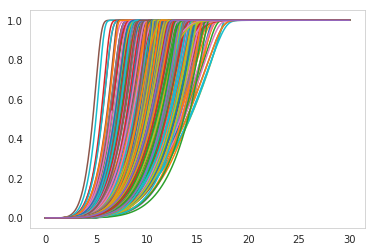

In [60]:
plt.figure()
for n in range(len(m1p19oe)):
    plt.plot(t/60, mode1df_m1p19oe.loc[n]['MLKLa_obs'].iloc[:]/5544)
plt.show()

In [51]:
thresh = 2772
ttdm1p19oe = []
for j in range(len(m1)):
    i_range = range(len(mode1df_m1p19oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p19oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p19oe.append(mode1df_m1p19oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p19oe.append(np.inf)
for i in range(len(ttdm1p19oe)):
    if ttdm1p19oe[i] == np.inf:
        ttdm1p19oe[i] = 2100   

In [72]:
print(ttdwt2[:10])

[10.340681362725451, 11.843687374749498, 11.963927855711423, 9.97995991983968, 10.521042084168336, 9.559118236472946, 10.220440881763526, 11.122244488977957, 10.521042084168336, 11.182364729458918, 11.24248496993988, 10.881763527054108, 10.641282565130261, 10.400801603206414, 10.521042084168336, 10.220440881763526, 10.5811623246493, 9.97995991983968, 10.460921843687375, 10.761523046092185, 10.100200400801604, 11.002004008016032, 10.04008016032064, 9.799599198396795, 10.521042084168336, 9.859719438877756, 9.859719438877756, 10.160320641282565, 10.641282565130261, 10.160320641282565, 9.799599198396795, 10.100200400801604, 9.859719438877756, 10.340681362725451, 9.919839679358718, 10.220440881763526, 10.220440881763526, 10.160320641282565, 10.160320641282565, 11.24248496993988, 10.821643286573146, 10.04008016032064, 10.04008016032064, 9.919839679358718, 11.302605210420841, 11.24248496993988, 11.002004008016032, 12.144288577154308, 11.122244488977957, 10.5811623246493, 10.220440881763526, 1

In [73]:
ttdwt2 = [ttdwt / 60 for ttdwt in ttdwt]
ttdm1p3kd2 = [ttdp3kd / 60 for ttdp3kd in ttdp3kd]
ttdm1p10kd2 = [ttdp10kd / 60 for ttdp10kd in ttdp10kd]
ttdm1p11kd2 = [ttdm1p11kd / 60 for ttdm1p11kd in ttdm1p11kd]
ttdm1p12kd2 = [ttdm1p12kd / 60 for ttdm1p12kd in ttdm1p12kd]
ttdm1p13kd2 = [ttdm1p13kd / 60 for ttdm1p13kd in ttdm1p13kd]
ttdm1p15kd2 = [ttdm1p15kd / 60 for ttdm1p15kd in ttdm1p15kd]
ttdm1p16kd2 = [ttdm1p16kd / 60 for ttdm1p16kd in ttdm1p16kd]
ttdm1p17kd2 = [ttdm1p17kd / 60 for ttdm1p17kd in ttdm1p17kd]
ttdm1p18kd2 = [ttdm1p18kd / 60 for ttdm1p18kd in ttdm1p18kd]
ttdm1p19kd2 = [ttdm1p19kd / 60 for ttdm1p19kd in ttdm1p19kd]

In [218]:
m3occurrences = ttdwt.count(2100)
m3occurrences3kd = ttdp3kd.count(2100)
m3occurrences10kd = ttdp10kd.count(2100)
m3occurrences11kd = ttdm1p11kd.count(2100)
m3occurrences12kd = ttdm1p12kd.count(2100)
m3occurrences13kd = ttdm1p13kd.count(2100)
m3occurrences15kd = ttdm1p15kd.count(2100)
m3occurrences16kd = ttdm1p16kd.count(2100)
m3occurrences17kd = ttdm1p17kd.count(2100)
m3occurrences18kd = ttdm1p18kd.count(2100)
m3occurrences19kd = ttdm1p19kd.count(2100)
print(m3occurrences)
print(m3occurrences3kd)
print(m3occurrences10kd)
print(m3occurrences11kd)
print(m3occurrences12kd)
print(m3occurrences13kd)
print(m3occurrences15kd)
print(m3occurrences16kd)
print(m3occurrences17kd)
print(m3occurrences18kd)
print(m3occurrences19kd)

20
50
26
25
6
27
22
23
16
18
18


In [74]:
ttdm1p3oe2 = [ttdp3oe / 60 for ttdp3oe in ttdp3oe]
ttdm1p10oe2 = [ttdp10oe / 60 for ttdp10oe in ttdp10oe]
ttdm1p11oe2 = [ttdm1p11oe / 60 for ttdm1p11oe in ttdm1p11oe]
ttdm1p12oe2 = [ttdm1p12oe / 60 for ttdm1p12oe in ttdm1p12oe]
ttdm1p13oe2 = [ttdm1p13oe/ 60 for ttdm1p13oe in ttdm1p13oe]
ttdm1p15oe2 = [ttdm1p15oe / 60 for ttdm1p15oe in ttdm1p15oe]
ttdm1p16oe2 = [ttdm1p16oe/ 60 for ttdm1p16oe in ttdm1p16oe]
ttdm1p17oe2 = [ttdm1p17oe/ 60 for ttdm1p17oe in ttdm1p17oe]
ttdm1p18oe2 = [ttdm1p18oe / 60 for ttdm1p18oe in ttdm1p18oe]
ttdm1p19oe2 = [ttdm1p19oe / 60 for ttdm1p19oe in ttdm1p19oe]

In [219]:
print(ttdm1p3oe2.count(35))
print(ttdm1p10oe2.count(35))
print(ttdm1p11oe2.count(35))
print(ttdm1p12oe2.count(35))
print(ttdm1p13oe2.count(35))
print(ttdm1p15oe2.count(35))
print(ttdm1p16oe2.count(35))
print(ttdm1p17oe2.count(35))
print(ttdm1p18oe2.count(35))
print(ttdm1p19oe2.count(35))

12
24
24
22
27
21
26
19
24
28


In [88]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1 = pd.DataFrame({'WT': ttdwt2,
                         'P3 KD': ttdm1p3kd2,'P3 OE': ttdm1p3oe2,'P10 KD': ttdm1p10kd2,'P10 OE': ttdm1p10oe2,
                        'P11 KD': ttdm1p11kd2,'P11 OE': ttdm1p11oe2,'P12 KD': ttdm1p12kd2, 'P12 OE': ttdm1p12oe2, 
                      'P13 KD': ttdm1p13kd2, 'P13 OE': ttdm1p13oe2,'P15 KD': ttdm1p15kd2, 'P15 OE': ttdm1p15oe2,
                      'P16 KD': ttdm1p16kd2,'P16 OE': ttdm1p16oe2,'P17 KD': ttdm1p17kd2,'P17 OE': ttdm1p17oe2,
                      'P18 KD': ttdm1p18kd2,'P18 OE': ttdm1p18oe2, 'P19 KD': ttdm1p19kd2,'P19 OE': ttdm1p19oe2})
dfclus1hr = pd.DataFrame(data = mode1,
                        columns = ['WT','P3 KD','P3 OE','P10 KD','P10 OE','P11 KD','P11 OE','P12 KD', 'P12 OE',
                                   'P13 KD', 'P13 OE','P15 KD','P15 OE', 'P16 KD','P16 OE','P17 KD','P17 OE',
                                   'P18 KD','P18 OE','P19 KD','P19 OE'])

In [120]:
dfclus1hr.to_csv("mode1_allparamsensdf_ttds.csv")

No handles with labels found to put in legend.


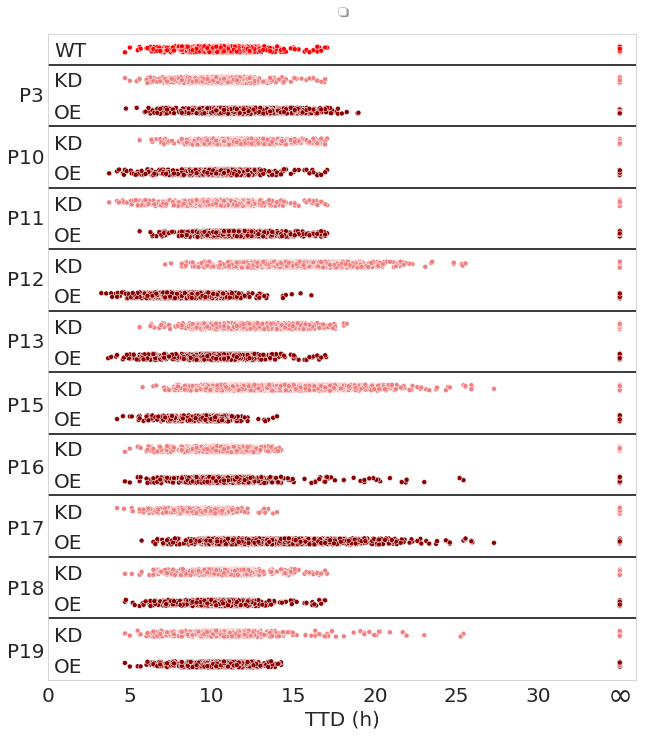

In [216]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.919), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.869), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.821), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.775), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.727), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.678), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.630), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.584), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.537), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.441), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.394), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.347), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.298), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.25), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.203), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.155), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.107), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.06), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.012), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# # plt.axhline(y=18.5, color = 'k')
# # plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (-0.05,.895), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P10', xy = (-0.07,.80), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P11', xy = (-0.07,.705), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P12', xy = (-0.07,.61), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.515), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P15', xy = (-0.07,.415), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P16', xy = (-0.07,.32), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P17', xy = (-0.07,.225), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P18', xy = (-0.07,.132), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P19', xy = (-0.07,.035), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode1_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite.pdf')

No handles with labels found to put in legend.


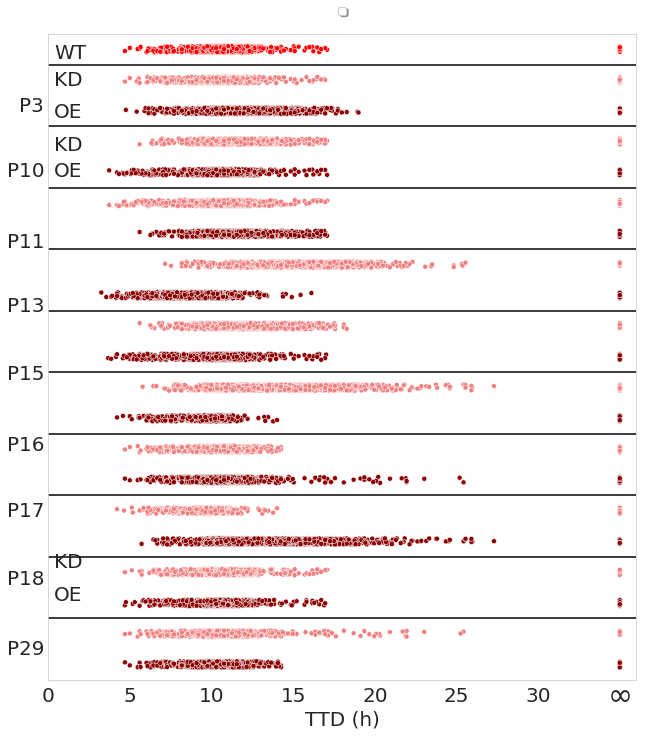

In [117]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal) #, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', '','', '',
                                             '', '', '','','', '',''])
plt.annotate('P3', xy = (-0.05,.88), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P10', xy = (-0.07,.78), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P11', xy = (-0.07,.67), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P13', xy = (-0.07,.57), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P15', xy = (-0.07,.465), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P16', xy = (-0.07,.355), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P17', xy = (-0.07,.253), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P18', xy = (-0.07,.148), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P29', xy = (-0.07,.039), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)



plt.annotate('WT', xy = (0.01,.962), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.92), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.87), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.82), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.779), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.699), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.647), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.594), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.543), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.437), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.384), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.331), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.278), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.227), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

plt.annotate('KD', xy = (0.01,.174), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.123), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.068), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.015), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode2_paramsens_100tnf_stripdots_hrs_kdoeinside.pdf')

No handles with labels found to put in legend.


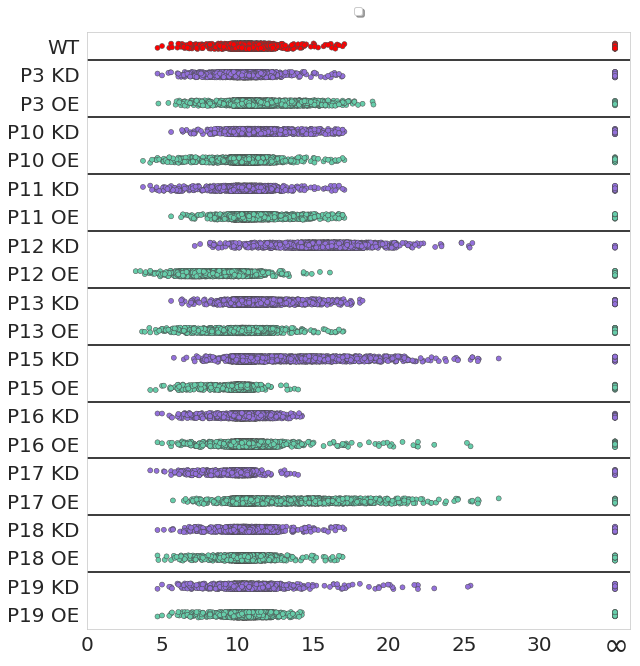

In [103]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,9))
my_pal = {"WT": "red",'P3 KD': "mediumpurple",'P3 OE':"mediumaquamarine",'P10 KD': "mediumpurple",
          'P10 OE':"mediumaquamarine",'P11 KD': "mediumpurple",
          'P11 OE':"mediumaquamarine", 'P12 KD': "mediumpurple",'P12 OE':"mediumaquamarine",
          'P13 KD': "mediumpurple",'P13 OE':"mediumaquamarine",'P15 KD': "mediumpurple",
          'P15 OE':"mediumaquamarine", 'P16 KD': "mediumpurple",
          'P16 OE':"mediumaquamarine",'P17 KD': "mediumpurple",'P17 OE':"mediumaquamarine",
          'P18 KD': "mediumpurple",'P18 OE':"mediumaquamarine",'P19 KD': "mediumpurple",
          'P19 OE':"mediumaquamarine"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus1hr), marker = 'o',linewidth=0.5,size=5, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)

# plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate(r'$\infty$', xy = (0.95,-0.04), xycoords ='axes fraction', fontsize = 30)
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
# plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_initparams_100tnf_stripdots_24hrs_newcolors.pdf')

No handles with labels found to put in legend.


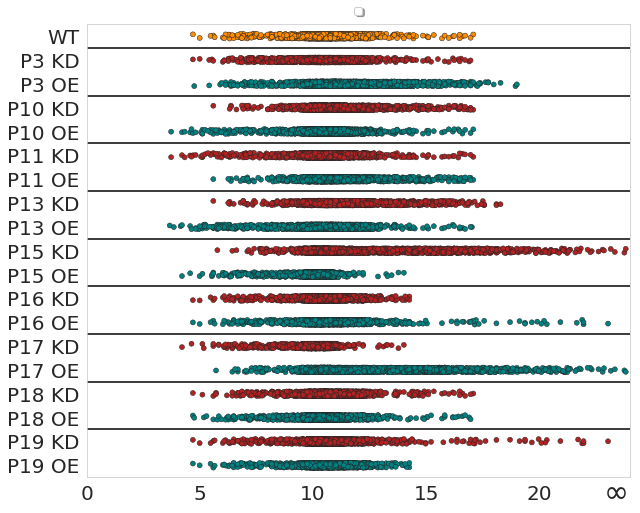

In [87]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange",'P3 KD': "firebrick",'P3 OE':"teal",'P10 KD': "firebrick",'P10 OE':"teal",
          'P11 KD': "firebrick",'P11 OE':"teal", 'P13 KD': "firebrick",'P13 OE':"teal",'P15 KD': "firebrick",
          'P15 OE':"teal", 'P16 KD': "firebrick",
          'P16 OE':"teal",'P17 KD': "firebrick",'P17 OE':"teal",'P18 KD': "firebrick",'P18 OE':"teal",
          'P19 KD': "firebrick",
          'P19 OE':"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus1hr), marker = 'o',linewidth=0.5,size=5, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)

# plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)


plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
# plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 24, xmin = 0)
# ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_initsens_a20ciapcyld_100tnf_stripdots_hrs_kdoeinside.pdf')

In [ ]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2,
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'cIAP KD': ttdm2ciapkd2,a
                         'cIAP OE': ttdm2ciapoe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KD','A20 OE','cIAP KD','cIAP OE','CYLD KD','CYLD OE'])

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "indianred", "cIAP KD": "lightsalmon", "cIAP OE": "mediumseagreen", 
          "A20 KD": "lightsalmon", "A20 OE": "mediumseagreen", 
          "CYLD KD": "lightsalmon", "CYLD OE": "mediumseagreen"}
# my_pal1 = {"wt0": "red", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfmode22), zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c2)):
    plt.plot(tspan, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue', alpha= 0.4)
#     plt.plot(tspan, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'orange', alpha = 0.25)
#     plt.plot(tspan, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.25)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (m)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 1800)
plt.ylim(ymin = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBACKD', 'LUBACOE'], prop={'size': 10}, loc = 'best')
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_linesmin.pdf')
plt.show() 

In [ ]:
ttdm2a20kd

In [ ]:
print(len(ttdm2wt))
print(len(ttdm2lubkd))
print(len(ttdm2luboe2))
print(len(ttdm2a20kd))
print(len(ttdm2a20oe))
print(len(ttdm2cyldoe))
print(len(ttdm2cyldkd))

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2ciap = pd.DataFrame({'KD': ttdm2ciapkd,
                         'OE': ttdm2ciapoe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
dfmode2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','WT','KD','OE'])
dfm2 = pd.melt(dfmode2, id_vars=["species"])

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
# sns.stripplot(data=mode2wt, orient = 'h',linewidth=0.5,size=10)
sns.stripplot(data=dfm2, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize = (12,7))
b = sns.boxplot(data=dfm2, palette="Set3", orient = 'h') #,showfliers = False, whis = 0)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm2, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm2, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm2, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.5})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.boxplot(x = 'variable', y = 'value', label ='WT',color=["red",'green'], bins=10, **kwargs, kde = True)
# g = sns.boxplot(y='variable',x='value',data=dfclus2n, showfliers=True, boxprops=dict(alpha=1))
g = sns.stripplot(y='variable',x='value',data=dfm22, 
                        marker="o", alpha=0.3, order=['WT', 'LUBACKD','LUBACOE','A20KD', 'A20OE','CYLDKD', 'CYLDOE'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# sns.distplot(mode2_lubacoe, label = 'LUBAC KD',color="blue", bins=10, **kwargs, kde = True)
# sns.distplot(mode2_lubackd, label = 'LUBAC OE',color="green", bins=10, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (m)')
plt.ylabel('Species')
plt.legend(loc = 'best')
# plt.xlim(xmin = 1, xmax = 1000)
# ax.set_yticks([1, 1.5, 2])
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_strip.pdf')
plt.show()

In [ ]:
list(model.initial_conditions)

In [ ]:
solverkdm2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2fadd   = solverkdm2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):2695},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2fadd  = mode1kdm2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2kdfadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdfadd.append(mode1df_kdm2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdfadd.append(np.inf)
for i in range(len(ttdm2kdfadd)):
    if ttdm2kdfadd[i] == np.inf:
        ttdm2kdfadd[i] = 2100               

In [ ]:
solveroem2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2fadd  = solveroem2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):89860},
                                        param_values=m2, num_processors = 20)
mode1df_oem2fadd = mode1oem2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2oefadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oefadd.append(mode1df_oem2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oefadd.append(np.inf)
for i in range(len(ttdm2oefadd)):
    if ttdm2oefadd[i] == np.inf:
        ttdm2oefadd[i] = 2100               

In [ ]:
solverkdm2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2r3   = solverkdm2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):3196},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2r3  = mode1kdm2r3.dataframe

In [ ]:
thresh = 2772
ttdm2kdr3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdr3.append(mode1df_kdm2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdr3.append(np.inf)
for i in range(len(ttdm2kdr3)):
    if ttdm2kdr3[i] == np.inf:
        ttdm2kdr3[i] = 2100               

In [ ]:
solveroem2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2r3  = solveroem2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):106540},
                                        param_values=m2, num_processors = 20)
mode1df_oem2r3 = mode1oem2r3.dataframe

In [ ]:
thresh = 2772
ttdm2oer3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oer3.append(mode1df_oem2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oer3.append(np.inf)
for i in range(len(ttdm2oer3)):
    if ttdm2oer3[i] == np.inf:
        ttdm2oer3[i] = 2100               

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
mode2fadd = pd.DataFrame({'KD': ttdm2kdfadd,
                          'OE': ttdm2oefadd,
                        'species': 'fadd'})
mode2r3 = pd.DataFrame({'KD': ttdm2kdr3,
                          'OE': ttdm2oer3,
                        'species': 'rip3'})
framesm3 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','WT','KD','OE'])
dfm23 = pd.melt(dfmode3, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

In [ ]:
print(len(ttdm2wt))

In [ ]:
m4occurrenceswt = ttdm2wt.count(2100)
m4occurrenceslub = ttdm2lubkd.count(2100)
m4occurrencesfadd = ttdm2kdfadd.count(2100)
m4occurrencesr3 = ttdm2kdr3.count(2100)
print(m4occurrenceswt)
print(m4occurrenceslub)
print(m4occurrencesfadd)
print(m4occurrencesr3)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm23, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm23, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttdm2wt, 
                        'LUBAC KD': ttdm2lubkd,
                         'LUBAC OE': ttdm2luboe2,
                        'A20 KD': ttdm2a20kd,
                          'A20 OE': ttdm2a20oe,
                        'CYLD KD': ttdm2cyldkd,
                          'CYLD OE': ttdm2cyldoe})
dfclus0n = pd.DataFrame(data = mode1df,
                        columns = ['WT', 'LUBAC KD', 'LUBAC OE','A20 KD', 'A20 OE','CYLD KD', 'CYLD OE'])
dfclus1n = pd.melt(dfclus0n)

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',linewidth=0.5,size=5, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_stripdots.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_strip.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',zorder=2, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf.pdf')

In [ ]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [ ]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               